In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

***This is a test.***

In [ ]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


<Axes: xlabel='academic_reputation', ylabel='location'>

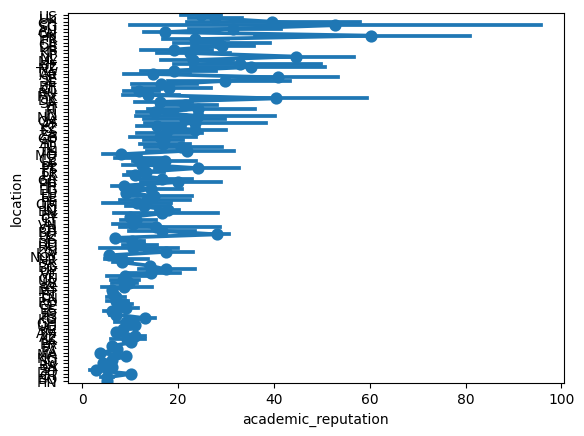

In [28]:
sns.pointplot(data=df, y='location',x='academic_reputation')


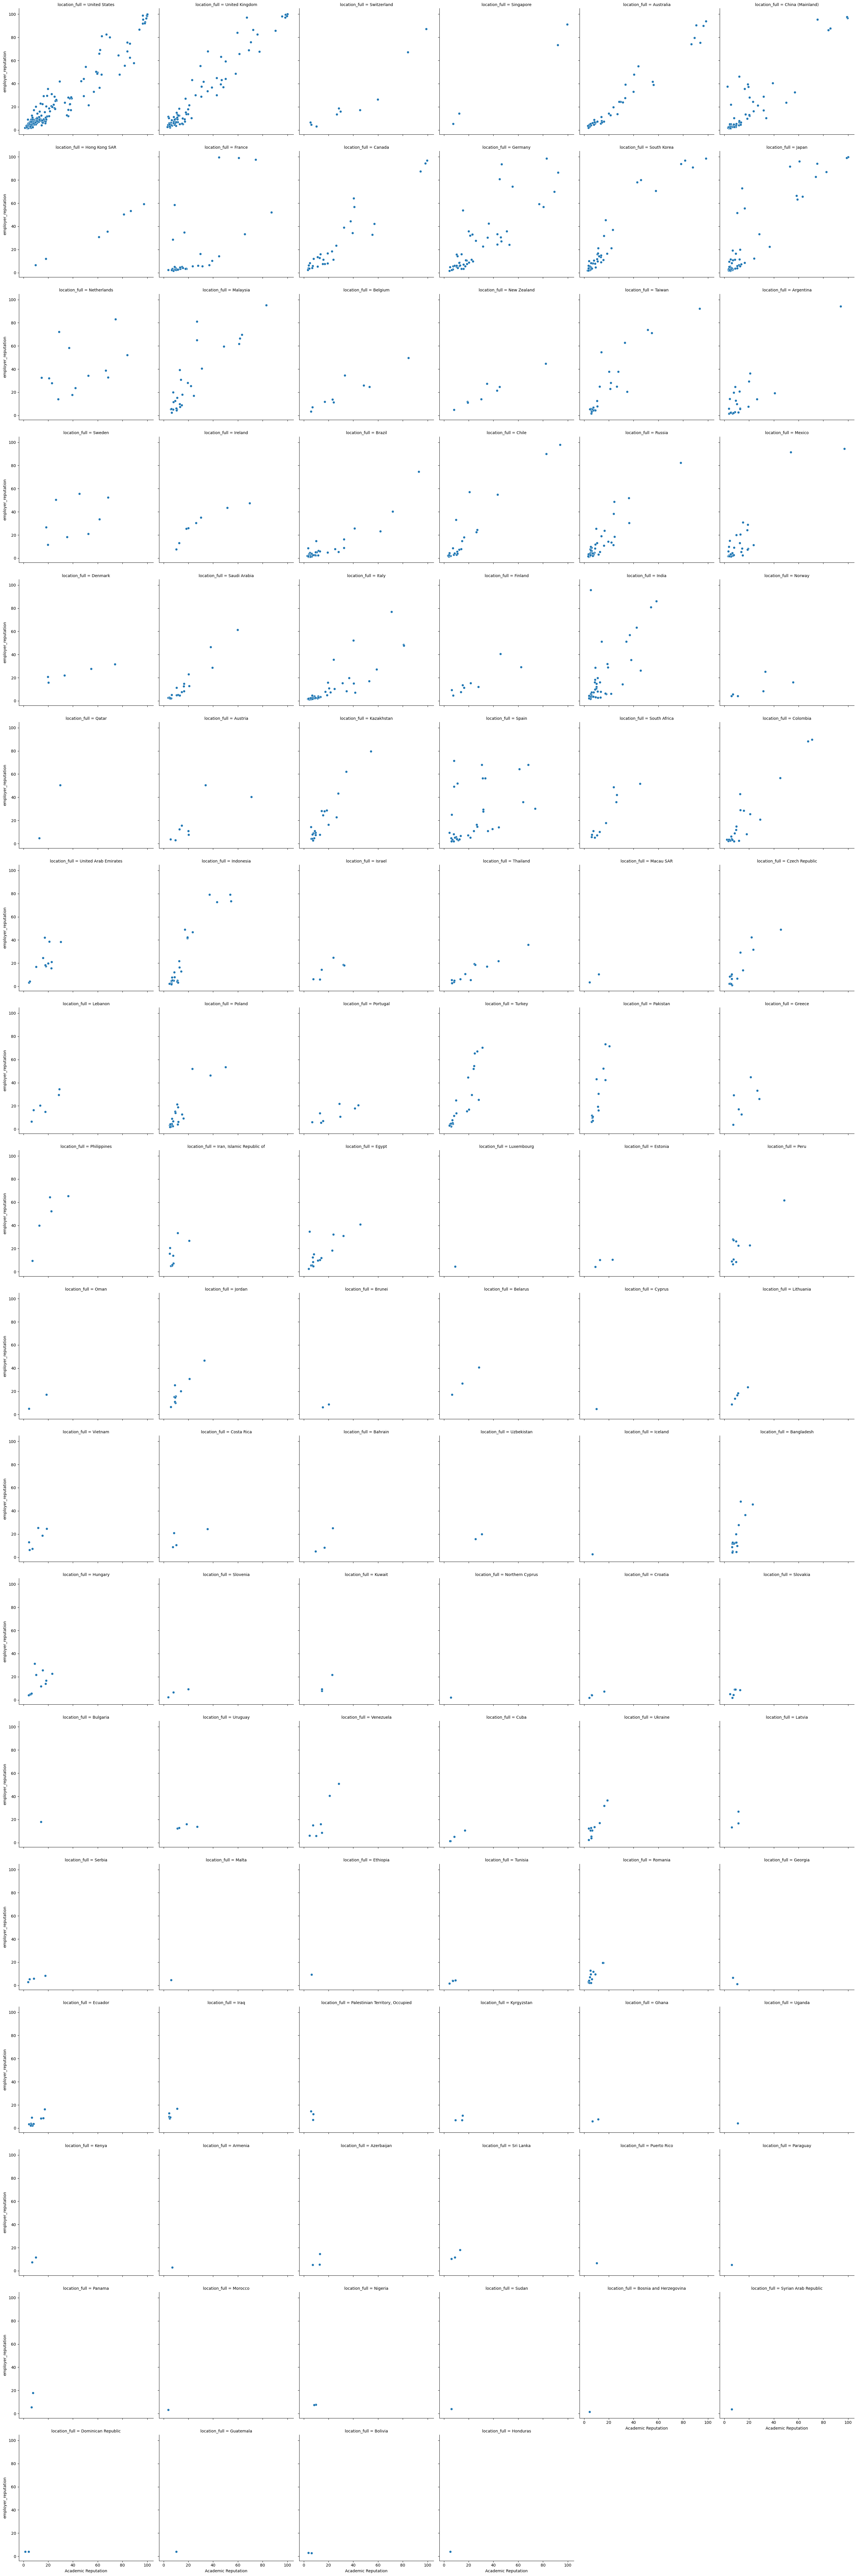

In [ ]:
g = sns.relplot(x='academic_reputation', y='employer_reputation', data=df, kind='scatter',col='location_full', col_wrap=6)
g.set(xlabel='Academic Reputation')

In order to help our students make an informed decision, we want to first make them aware of what kinds of schools are out there. We’ll assume that our student is interested specifically in going to college at one of the schools ranked within the 2024 QS World University top schools list.

Often, a first consideration for a student when picking a school is geographic location. Do they want to stay close to home, or are they willing to go to school somewhere far away? Let us assume that domestic universities would be considered closer to home, and that anything outside of the US would be considered far away. So based on the ranking data, does it look like we have more strong options within the US, or outside of the US?

When we examine the number of schools in the dataset, counting the number of US vs OUS schools, and comparing the number of schools in each category that are in the top 100 of the rankings for 2025, we see that:
o	Three quarters of those in the top 100 schools are OUS
o	There are 10x as many OUS high ranked schools compared to US


Perhaps another value of interest is in looking at schools that have been improving in their rankings. Let’s create a scatterplot comparing 2024 ranking vs 2025 ranking, and use the US/OUS variable as a hue to separate them by color. (Alternatively, we could create a named field for the rank change, and make a line plot of the RankChange, comparing US vs OUS to see whether US or foreign schools are generally improving more in the last year).

We want to see if larger schools are better ranked on sustainability than smaller schools. Let’s look at plots for each of the four sizes, side by side. We want to look at their sustainability scores within each size category, and see if the average sustainability score / spread is better for a particular size category.

<Axes: xlabel='sustainability', ylabel='size'>

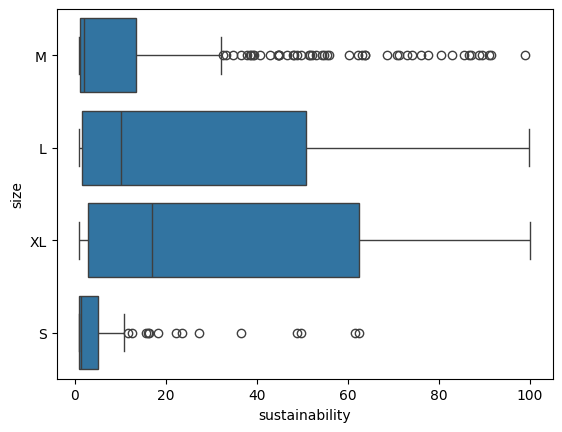

In [44]:
sns.boxplot(data=df,x='sustainability',y='size')

It appears that the median sustainability score tends to be much lower at small and medium sized schools. 75% of medium schools had a sustainability score below 20, though there are many outliers. Large and XL sized schools have slightly higher median sustainability scores, but the values are far more spread out.

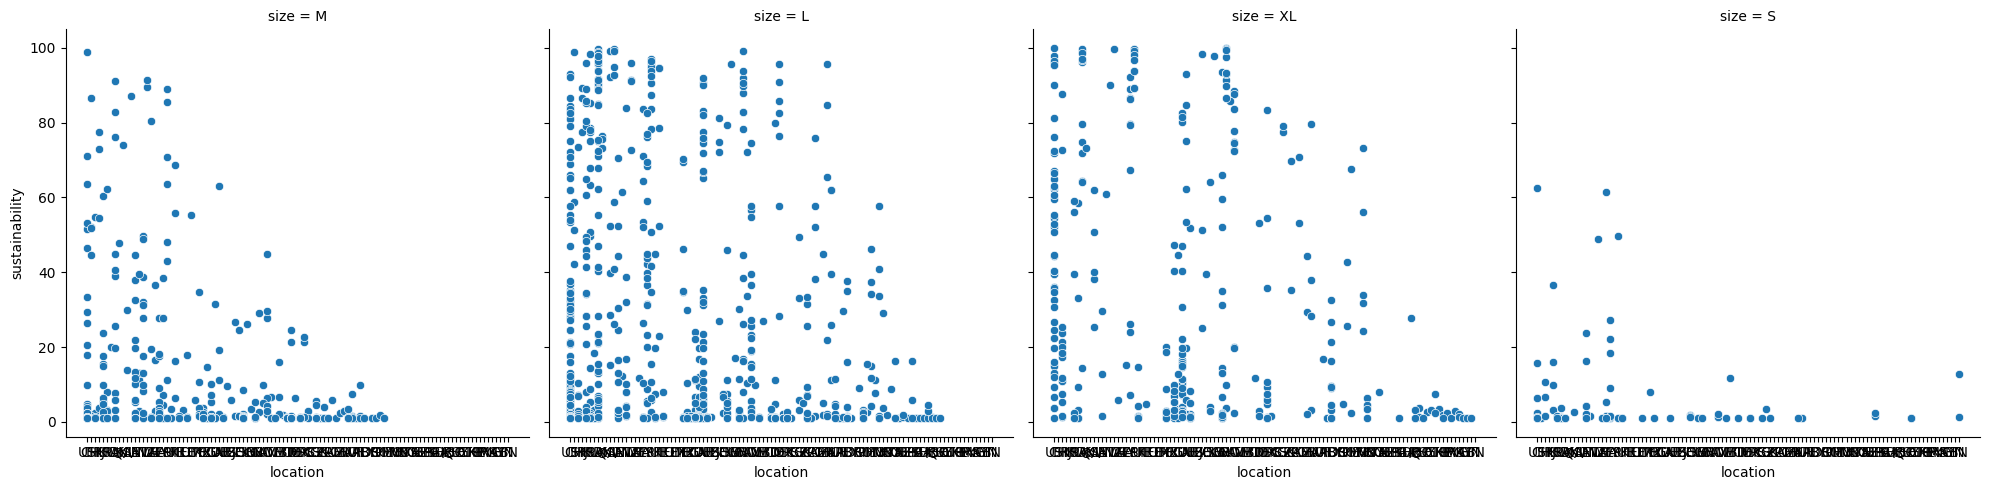

In [41]:
m = sns.relplot(data=df, x='location', y='sustainability', col="size")